In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = [224, 224]

In [5]:
train_directory='../input/100-bird-species/train'
test_directory='../input/100-bird-species/test'
val_directory='../input/100-bird-species/valid'

In [6]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [7]:
  # useful for getting number of classes
folders = glob('../input/100-bird-species/train/*')
len(folders)

270

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 38518 images belonging to 270 classes.
Found 1350 images belonging to 270 classes.


In [12]:
print(len(training_set))
print(len(test_set))

1204
43


In [13]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
1204/1204 [==============================] - 601s 499ms/step - loss: 4.4427 - accuracy: 0.3739 - val_loss: 2.1953 - val_accuracy: 0.6593
Epoch 2/5
1204/1204 [==============================] - 443s 368ms/step - loss: 2.4689 - accuracy: 0.6264 - val_loss: 1.7009 - val_accuracy: 0.7289
Epoch 3/5
1204/1204 [==============================] - 447s 371ms/step - loss: 1.9727 - accuracy: 0.7041 - val_loss: 1.6581 - val_accuracy: 0.7526
Epoch 4/5
1204/1204 [==============================] - 448s 372ms/step - loss: 1.6574 - accuracy: 0.7522 - val_loss: 1.7379 - val_accuracy: 0.7644
Epoch 5/5
1204/1204 [==============================] - 448s 372ms/step - loss: 1.4472 - accuracy: 0.7838 - val_loss: 1.9952 - val_accuracy: 0.7615


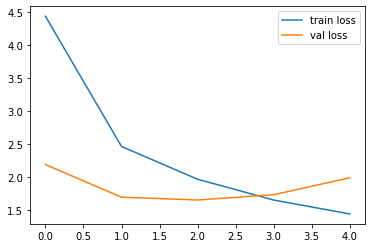

In [14]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

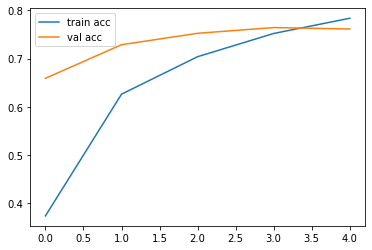

In [15]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [16]:
model.save('BC.h5')

In [25]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('./BC.h5',compile=False)  

In [26]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [27]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

'BARN OWL'

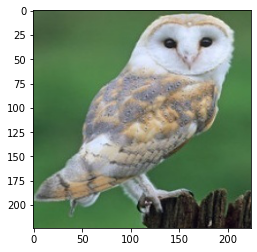

In [28]:
img='../input/100-bird-species/valid/BARN OWL/1.jpg'
pic=load_img('../input/100-bird-species/valid/BARN OWL/1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

In [29]:
import tensorflow as tf
import keras as k
print(tf.__version__)
print(k.__version__)

2.3.1
2.4.3
